<h1 align = "center"> Non-parametric tests </h2>

### Some key terms:
* When to use non-parametric tests: Ranking the data will lose the information about the magnitude of differences between scores. It is not as powerful as parametric test only if the assumption of the parametric tests are met (the sampling distribution is normally distributed)

In [1]:
#------And then load these packages, along with the boot package.-----

library(car)
library(clinfun)
library(ggplot2)
library(pastecs)
library(pgirmess)

#********************* Wilcoxon Rank Sum ********************

Loading required package: boot

Attaching package: 'boot'

The following object is masked from 'package:car':

    logit



### Wilcoxon rank sum test: equivalent to the compare two means (independent group)

In [2]:
#Enter raw data
sundayBDI<-c(15, 35, 16, 18, 19, 17, 27, 16, 13, 20, 16, 15, 20, 15, 16, 13, 14, 19, 18, 18)
wedsBDI<-c(28, 35, 35, 24, 39, 32, 27, 29, 36, 35, 5, 6, 30, 8, 9, 7, 6, 17, 3, 10)
drug<-gl(2, 10, labels = c("Ecstasy", "Alcohol"))
drugData<-data.frame(drug, sundayBDI, wedsBDI)

In [3]:
#exploratory analysis
by(drugData[,c(2:3)], drugData$drug, stat.desc, basic=FALSE, norm=TRUE)
leveneTest(drugData$sundayBDI, drugData$drug, center = "mean")
leveneTest(drugData$wedsBDI, drugData$drug, center = "mean")

drugData$drug: Ecstasy
               sundayBDI    wedsBDI
median       17.50000000 33.5000000
mean         19.60000000 32.0000000
SE.mean       2.08806130  1.5129074
CI.mean.0.95  4.72352283  3.4224344
var          43.60000000 22.8888889
std.dev       6.60302961  4.7842334
coef.var      0.33688927  0.1495073
skewness      1.23571300 -0.2191665
skew.2SE      0.89929826 -0.1594999
kurtosis      0.26030385 -1.4810114
kurt.2SE      0.09754697 -0.5549982
normtest.W    0.81063991  0.9411413
normtest.p    0.01952060  0.5657814
------------------------------------------------------------ 
drugData$drug: Alcohol
               sundayBDI      wedsBDI
median       16.00000000  7.500000000
mean         16.40000000 10.100000000
SE.mean       0.71802197  2.514181996
CI.mean.0.95  1.62427855  5.687474812
var           5.15555556 63.211111111
std.dev       2.27058485  7.950541561
coef.var      0.13845030  0.787182333
skewness      0.11686189  1.500374383
skew.2SE      0.08504701  1.091907319
kurtosis

,Df,F value,Pr(>F)
group,1.00000000,3.64362245,0.07235984
,18,NA,NA


,Df,F value,Pr(>F)
group,1.0000000,0.5081257,0.4850905
,18,NA,NA


In [5]:
#wilcox.test(x, y = NULL, alternative = c("two.sided", "less", "greater"),
     #  mu = 0, paired = FALSE, exact = FALSE, correct = FALSE, conf.level = 0.95, na.action = na.exclude)

# When the rank has a tie, we can't use the exact method which is based on mento-carlo simulation
# (randomly assign rank to all the observations and look at how many times the result will show higher than the observed one)
sunModel<-wilcox.test(sundayBDI ~ drug, data = drugData)
sunModel
wedModel<-wilcox.test(wedsBDI ~ drug, data = drugData)
wedModel


sunModel<-wilcox.test(sundayBDI ~ drug, data = drugData, exact = FALSE, correct= FALSE)
sunModel
wedModel<-wilcox.test(wedsBDI ~ drug, data = drugData, exact = FALSE, correct= FALSE)
wedModel

Warning message:
In wilcox.test.default(x = c(15, 35, 16, 18, 19, 17, 27, 16, 13, : cannot compute exact p-value with ties


	Wilcoxon rank sum test with continuity correction

data:  sundayBDI by drug
W = 64.5, p-value = 0.2861
alternative hypothesis: true location shift is not equal to 0


Warning message:
In wilcox.test.default(x = c(28, 35, 35, 24, 39, 32, 27, 29, 36, : cannot compute exact p-value with ties


	Wilcoxon rank sum test with continuity correction

data:  wedsBDI by drug
W = 96, p-value = 0.000569
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  sundayBDI by drug
W = 64.5, p-value = 0.2692
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  wedsBDI by drug
W = 96, p-value = 0.0004943
alternative hypothesis: true location shift is not equal to 0


In [11]:
#Jane superbrain:
g1 <- drugData$sundayBDI[drugData$drug == "Alcohol"]
g2 <- drugData$sundayBDI[drugData$drug == "Ecstasy"]
n1 <- length(g1); n2 <- length(g2)
w <- rank(c(g1, g2)) 
r1 <- w[1:n1]; r2 <- w[(n1+1):(n1+n2)]
w1 <- sum(r1); w2 <- sum(r2)
wilc1 <- w1-n1*(n1+1)/2; wilc2 <- w2-n2*(n2+1)/2
wilc = min(wilc1, wilc2)
wilc
m1 <- mean(r1); m2 <- mean(r2)
m1; m2

rFromWilcox<-function(wilcoxModel, N){
	z<- qnorm(wilcoxModel$p.value/2)
	r<- z/ sqrt(N)
	cat(wilcoxModel$data.name, "Effect Size, r = ", r)
}

rFromWilcox(sunModel, 20)
rFromWilcox(wedModel, 20)

[1] 35.5

[1] 9.05

[1] 11.95

sundayBDI by drug Effect Size, r =  -0.2470529wedsBDI by drug Effect Size, r =  -0.7790076

### Wilcoxon signed rank test: equivalent to the compare two means (dependent group)

In [6]:
#********************* Wilcoxon Signed Rank ********************

drugData$BDIchange<-drugData$wedsBDI-drugData$sundayBDI 
by(drugData$BDIchange, drugData$drug, stat.desc, basic = FALSE, norm = TRUE) #it violates the nomarlity for Algohol

drugData$drug: Ecstasy
      median         mean      SE.mean CI.mean.0.95          var      std.dev 
  14.0000000   12.4000000    2.5307004    5.7248420   64.0444444    8.0027773 
    coef.var     skewness     skew.2SE     kurtosis     kurt.2SE   normtest.W 
   0.6453853   -0.4140842   -0.3013525   -1.3686700   -0.5128991    0.9087803 
  normtest.p 
   0.2727175 
------------------------------------------------------------ 
drugData$drug: Alcohol
      median         mean      SE.mean CI.mean.0.95          var      std.dev 
 -7.50000000  -6.30000000   2.09788253   4.74573999  44.01111111   6.63408706 
    coef.var     skewness     skew.2SE     kurtosis     kurt.2SE   normtest.W 
 -1.05302969   1.23907117   0.90174219   0.98664006   0.36973617   0.82795980 
  normtest.p 
  0.03161929 

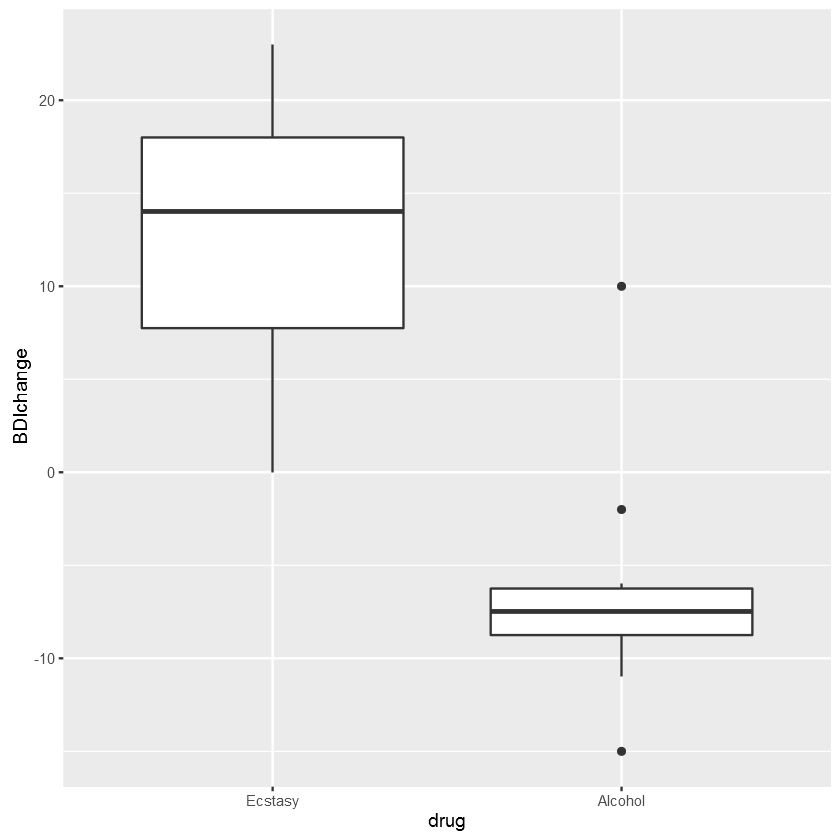

In [7]:
boxplot<-ggplot(drugData, aes(drug, BDIchange)) + geom_boxplot()
boxplot

In [8]:
alcoholData<-subset(drugData, drug == "Alcohol")
ecstasyData<-subset(drugData, drug == "Ecstasy")

In [9]:
alcoholModel<-wilcox.test(alcoholData$wedsBDI, alcoholData$sundayBDI,  paired = TRUE, correct= FALSE)
alcoholModel
ecstasyModel<-wilcox.test(ecstasyData$wedsBDI, ecstasyData$sundayBDI, paired = TRUE, correct= FALSE)
ecstasyModel

Warning message:
In wilcox.test.default(alcoholData$wedsBDI, alcoholData$sundayBDI, : cannot compute exact p-value with ties


	Wilcoxon signed rank test

data:  alcoholData$wedsBDI and alcoholData$sundayBDI
V = 8, p-value = 0.04657
alternative hypothesis: true location shift is not equal to 0


Warning message:
In wilcox.test.default(ecstasyData$wedsBDI, ecstasyData$sundayBDI, : cannot compute exact p-value with tiesWarning message:
In wilcox.test.default(ecstasyData$wedsBDI, ecstasyData$sundayBDI, : cannot compute exact p-value with zeroes


	Wilcoxon signed rank test

data:  ecstasyData$wedsBDI and ecstasyData$sundayBDI
V = 36, p-value = 0.01151
alternative hypothesis: true location shift is not equal to 0


In [12]:
rFromWilcox(alcoholModel, 20)
rFromWilcox(ecstasyModel, 20)

alcoholData$wedsBDI and alcoholData$sundayBDI Effect Size, r =  -0.4450246ecstasyData$wedsBDI and ecstasyData$sundayBDI Effect Size, r =  -0.5649883

In [13]:
#********************* Kruskal-Wallis ********************

Sperm<-c(0.35, 0.58, 0.88, 0.92, 1.22, 1.51, 1.52, 1.57, 2.43, 2.79, 3.40, 4.52, 
         4.72, 6.90, 7.58, 7.78, 9.62, 10.05, 10.32, 21.08, 0.33, 0.36, 0.63, 0.64, 0.77, 
         1.53, 1.62, 1.71, 1.94, 2.48, 2.71, 4.12, 5.65, 6.76, 7.08, 7.26, 7.92, 8.04, 12.10, 
         18.47, 0.40, 0.60, 0.96, 1.20, 1.31, 1.35, 1.68, 1.83, 2.10, 2.93, 2.96, 3.00, 3.09, 3.36, 
         4.34, 5.81, 5.94, 10.16, 10.98, 18.21, 0.31, 0.32, 0.56, 0.57, 0.71, 0.81, 0.87, 1.18, 1.25, 
         1.33, 1.34, 1.49, 1.50, 2.09, 2.70, 2.75, 2.83, 3.07, 3.28, 4.11)
Soya<-gl(4, 20, labels = c("No Soya", "1 Soya Meal", "4 Soya Meals", "7 Soya Meals"))
soyaData<-data.frame(Sperm, Soya)

soyaData$Soya<-factor(soyaData$Soya, levels = levels(soyaData$Soya)[c(4, 1, 2, 3)])

by(soyaData$Sperm, soyaData$Soya, stat.desc, basic=FALSE)
by(soyaData$Sperm, soyaData$Soya, stat.desc, desc = FALSE, basic=FALSE, norm=TRUE)

leveneTest(soyaData$Sperm, soyaData$Soya)

soyaData$Soya: 7 Soya Meals
      median         mean      SE.mean CI.mean.0.95          var      std.dev 
   1.3350000    1.6535000    0.2479774    0.5190226    1.2298555    1.1089885 
    coef.var 
   0.6706916 
------------------------------------------------------------ 
soyaData$Soya: No Soya
      median         mean      SE.mean CI.mean.0.95          var      std.dev 
    3.095000     4.987000     1.136926     2.379614    25.852022     5.084488 
    coef.var 
    1.019549 
------------------------------------------------------------ 
soyaData$Soya: 1 Soya Meal
      median         mean      SE.mean CI.mean.0.95          var      std.dev 
    2.595000     4.606000     1.044822     2.186837    21.833057     4.672586 
    coef.var 
    1.014456 
------------------------------------------------------------ 
soyaData$Soya: 4 Soya Meals
      median         mean      SE.mean CI.mean.0.95          var      std.dev 
   2.9450000    4.1105000    0.9861233    2.0639798   19.4487839    4.4

soyaData$Soya: 7 Soya Meals
  skewness   skew.2SE   kurtosis   kurt.2SE normtest.W normtest.p 
 0.6086712  0.5942855 -0.9161653 -0.4615984  0.9122606  0.0703908 
------------------------------------------------------------ 
soyaData$Soya: No Soya
   skewness    skew.2SE    kurtosis    kurt.2SE  normtest.W  normtest.p 
1.546140856 1.509598499 2.328051363 1.172959394 0.805255802 0.001035917 
------------------------------------------------------------ 
soyaData$Soya: 1 Soya Meal
   skewness    skew.2SE    kurtosis    kurt.2SE  normtest.W  normtest.p 
1.350565932 1.318645901 1.422731699 0.716825470 0.825831600 0.002153894 
------------------------------------------------------------ 
soyaData$Soya: 4 Soya Meals
    skewness     skew.2SE     kurtosis     kurt.2SE   normtest.W   normtest.p 
1.8222369167 1.7791691502 2.7926151830 1.4070240317 0.7427432543 0.0001359072 

,Df,F value,Pr(>F)
group,3.00000000,2.86059664,0.04236514
,76,NA,NA


In [14]:
kruskal.test(Sperm ~ Soya, data = soyaData)
soyaData$Ranks<-rank(soyaData$Sperm)
by(soyaData$Ranks, soyaData$Soya, mean)


	Kruskal-Wallis rank sum test

data:  Sperm by Soya
Kruskal-Wallis chi-squared = 8.6589, df = 3, p-value = 0.03419


soyaData$Soya: 7 Soya Meals
[1] 27.35
------------------------------------------------------------ 
soyaData$Soya: No Soya
[1] 46.35
------------------------------------------------------------ 
soyaData$Soya: 1 Soya Meal
[1] 44.15
------------------------------------------------------------ 
soyaData$Soya: 4 Soya Meals
[1] 44.15

In [ ]:
ggplot(soyaData, aes(Soya, Sperm)) + geom_boxplot() +
  labs(y = "Sperm Count", x = "Number of Soya Meals Per Week")
  

In [ ]:
kruskalmc(Sperm ~ Soya, data = soyaData)
kruskalmc(Sperm ~ Soya, data = soyaData, cont = 'two-tailed')

jonckheere.test(soyaData$Sperm, as.numeric(soyaData$Soya))